### Практическое задание
#### Попробуйте видоизменить параметры разобранной на уроке двухслойной нейронной сети таким образом, чтобы улучшить ее точность. Проведите анализ — что приводит к ухудшению точности нейронной сети? Что приводит к увеличению ее точности?

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import warnings
warnings.simplefilter(action='ignore')

In [2]:
### Шаг 1. Определение функций, которые понадобяться для обучения
# преобразование массива в бинарный вид результатов
def to_one_hot(Y):
    n_col = np.amax(Y) + 1
    binarized = np.zeros((len(Y), n_col))
    for i in range(len(Y)):
        binarized[i, Y[i]] = 1.
    return binarized

# преобразование массива в необходимый вид
def from_one_hot(Y):
    arr = np.zeros((len(Y), 1))
    
    for i in range(len(Y)):
        l = layer2[i]
        for j in range(len(l)):
            if(l[j] == 1):
                arr[i] = j+1
    return arr

# сигмоида и ее производная
def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_deriv(x):
    return sigmoid(x)*(1 - sigmoid(x))

# нормализация массива
def normalize(X, axis=-1, order=2):
    l2 = np.atleast_1d(np.linalg.norm(X, order, axis))
    l2[l2 == 0] = 1
    return X / np.expand_dims(l2, axis)

In [3]:
# Выгрузка данных из датасета
from sklearn import datasets

iris = datasets.load_iris()

In [28]:
### Шаг 2. Подготовка тренировочных данных
iris_data = iris.data
iris_target = iris.target

x = normalize(iris_data)

# формирование выходных данных(результатов)
y = to_one_hot(iris_target)

# Разделение данных на тренировочные и тестовые
train_index, test_index = train_test_split(pd.DataFrame(x).index, test_size=0.33, shuffle=True, random_state=21)

X_train = x[train_index]
y_train = y[train_index]
X_test = x[test_index]
y_test = y[test_index]

In [9]:
### Шаг 3. Обученние нейронной сети
# Для повторяющихся обучений и удобного сравнения результатов, оформим функцию

def manual_tf(layer,leanrate, iterations):
    np.random.RandomState(21)
    w0 = 2*np.random.random((4, layer)) - 1 # для входного слоя   - 4 входа, layer выходов
    w1 = 2*np.random.random((layer, 3)) - 1 # для внутреннего слоя - layer входов, 3 выхода

    # массив для ошибок, чтобы потом построить график
    errors = []

    # процесс обучения
    for i in range(iterations):

        # прямое распространение(feed forward)
        layer0 = X_train
        layer1 = sigmoid(np.dot(layer0, w0))
        layer2 = sigmoid(np.dot(layer1, w1))

        # обратное распространение(back propagation) с использованием градиентного спуска
        layer2_error = y_train - layer2
        layer2_delta = layer2_error * sigmoid_deriv(layer2)

        layer1_error = layer2_delta.dot(w1.T)
        layer1_delta = layer1_error * sigmoid_deriv(layer1)

        w1 += layer1.T.dot(layer2_delta) * leanrate
        w0 += layer0.T.dot(layer1_delta) * leanrate

        error = np.mean(np.abs(layer2_error))
        errors.append(error)
        accuracy = (1 - error) * 100
        
    ### Шаг 4. Демонстрация полученных результатов
    # черчение диаграммы точности в зависимости от обучения
    plt.plot(errors)
    plt.xlabel('Обучение')
    plt.ylabel('Ошибка')
    plt.show() 

    print("Точность нейронной сети " + str(round(accuracy,2)) + "%")
    

#### Возьмем параметры урока

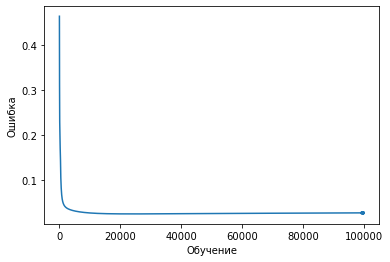

Точность нейронной сети 97.2%


In [11]:
manual_tf(5,0.1, 100000)

#### Увеличим количество слоев

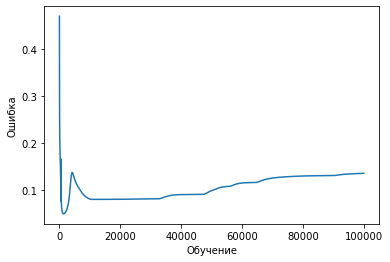

Точность нейронной сети 86.51%


In [13]:
manual_tf(6,0.1, 100000)

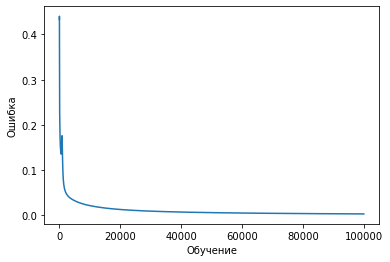

Точность нейронной сети 99.66%


In [15]:
manual_tf(7,0.1, 100000)

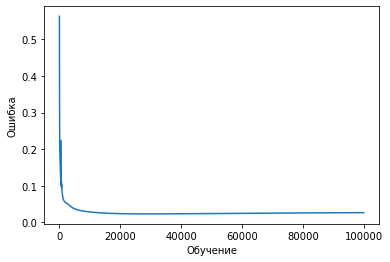

Точность нейронной сети 97.34%


In [17]:
manual_tf(8,0.1, 100000)

#### Несколько неоднозначный результат. При увеличении промежуточных слоев с 5 до 6 точность нейронной сети уменьшилась на 10%. При увеличении количества слоев до 7, точность увеличилась до 99.66%. При увеличении слоев до 8, точность снизилась на 2%.

#### Изменим скорость обучения

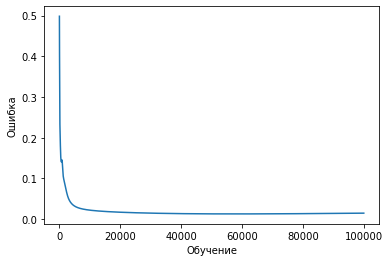

Точность нейронной сети 98.51%


In [19]:
manual_tf(5,0.05, 100000)

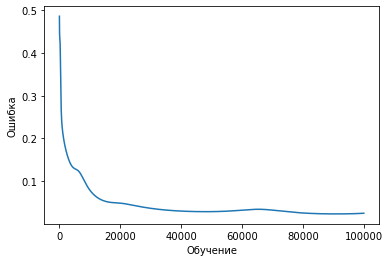

Точность нейронной сети 97.51%


In [21]:
manual_tf(5,0.01, 100000)

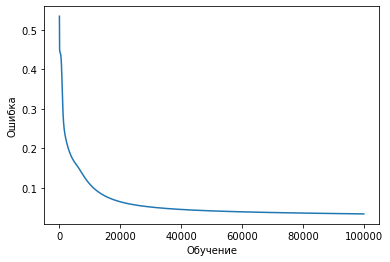

Точность нейронной сети 96.58%


In [23]:
manual_tf(5,0.005, 100000)

#### При  прочих равных первоначальных при уменьшении скорости обучения, точность снижается. Возможно, при других равных получится другой результат

#### Увеличим количество итераций

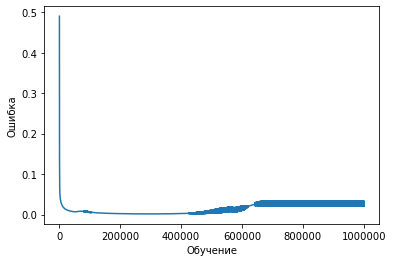

Точность нейронной сети 96.66%


In [25]:
manual_tf(5,0.1, 1000000)

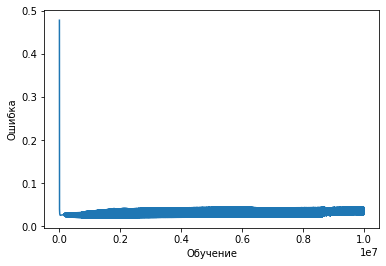

Точность нейронной сети 97.2%


In [27]:
manual_tf(5,0.1, 10000000)

#### Увеличение итераций в 100 раз не изменило точность.

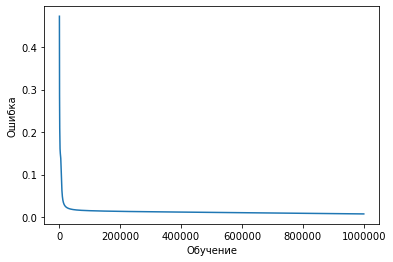

Точность нейронной сети 99.24%


In [29]:
manual_tf(7,0.01, 1000000)

#### Вывод: датасет ирисов довольно небольшой. Возможно, поэтому увеличение итераций,уменьшение скорости обучения не улучшают точность нейронной сети. Это больше похоже на переобучение.

#### Лучший результат 99.66 получился при количестве внутренних слоев  = 7, скорости обучения = 0.1, количестве итераций =  100000